In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_data=pd.read_csv('SalaryData_Train(1).csv')
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
salary_data_test=pd.read_csv('SalaryData_Test(1).csv')
salary_data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Initial investigation

In [4]:
salary_data_test.shape

(15060, 14)

In [5]:
salary_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [6]:
salary_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
salary_data['occupation'].nunique(),salary_data['occupation'].unique()

(14,
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repair', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object))

In [8]:
salary_data['relationship'].nunique(),salary_data['relationship'].unique()

(6,
 array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
        ' Other-relative'], dtype=object))

<AxesSubplot:xlabel='Salary', ylabel='count'>

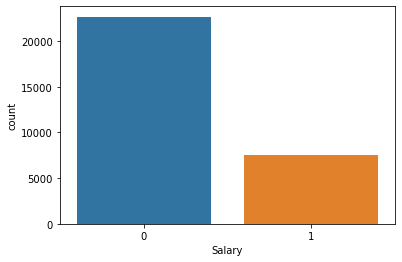

In [27]:
sns.countplot(x='Salary',data=salary_data)

### Data preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
salary_data['workclass']=le.fit_transform(salary_data['workclass'])
salary_data['education']=le.fit_transform(salary_data['education'])
salary_data['maritalstatus']=le.fit_transform(salary_data['maritalstatus'])
salary_data['occupation']=le.fit_transform(salary_data['occupation'])
salary_data['relationship']=le.fit_transform(salary_data['relationship'])
salary_data['race']=le.fit_transform(salary_data['race'])
salary_data['sex']=le.fit_transform(salary_data['sex'])
salary_data['native']=le.fit_transform(salary_data['native'])
salary_data['Salary']=le.fit_transform(salary_data['Salary'])
salary_data.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [6]:
salary_data_test['workclass']=le.fit_transform(salary_data_test['workclass'])
salary_data_test['education']=le.fit_transform(salary_data_test['education'])
salary_data_test['maritalstatus']=le.fit_transform(salary_data_test['maritalstatus'])
salary_data_test['occupation']=le.fit_transform(salary_data_test['occupation'])
salary_data_test['relationship']=le.fit_transform(salary_data_test['relationship'])
salary_data_test['race']=le.fit_transform(salary_data_test['race'])
salary_data_test['sex']=le.fit_transform(salary_data_test['sex'])
salary_data_test['native']=le.fit_transform(salary_data_test['native'])
salary_data_test['Salary']=le.fit_transform(salary_data_test['Salary'])
salary_data_test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

### Model building

In [7]:
x=salary_data.iloc[:,:13]
y=salary_data['Salary']

In [8]:
from sklearn.svm import SVC
svc_model=SVC().fit(x,y)

In [14]:
x_test=salary_data_test.iloc[:,:13]
y_test=salary_data_test['Salary']

In [15]:
y_pred=svc_model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,roc_auc_score

### Radial basis kernal

accuracyscore is    :  0.796
precision is        :  0.733
AUc score is        :  0.619
recall value is     :  0.269
comfusion matrix:


<AxesSubplot:>

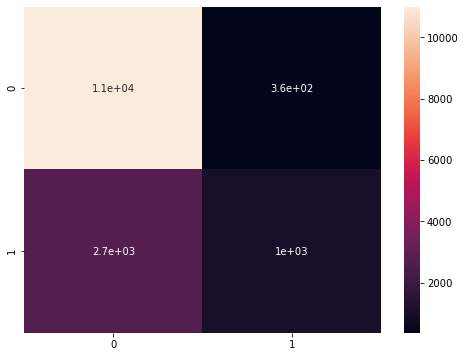

In [26]:
svc_classifier=SVC()
svc_classifier.fit(x,y)
y_pred_test=svc_classifier.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred_test),3))
print('precision is        : ',round(precision_score(y_test,y_pred_test),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred_test),3))
print('recall value is     : ',round(recall_score(y_test,y_pred_test),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True)

### Polynomial kernal

accuracyscore is    :  0.78
precision is        :  0.99
AUc score is        :  0.552
recall value is     :  0.104
comfusion matrix:


<AxesSubplot:>

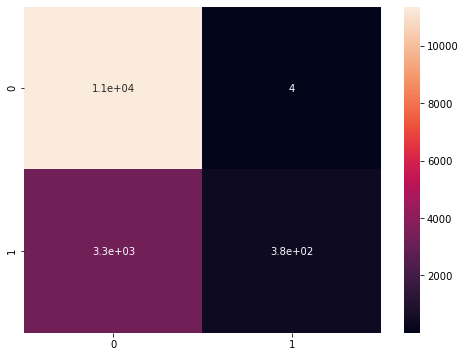

In [24]:
svc_classifier=SVC(kernel='poly')
svc_classifier.fit(x,y)
y_pred_test=svc_classifier.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred_test),3))
print('precision is        : ',round(precision_score(y_test,y_pred_test),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred_test),3))
print('recall value is     : ',round(recall_score(y_test,y_pred_test),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True)

### Sigmoidal kernal

accuracyscore is    :  0.757
precision is        :  0.511
AUc score is        :  0.579
recall value is     :  0.228
comfusion matrix:


<AxesSubplot:>

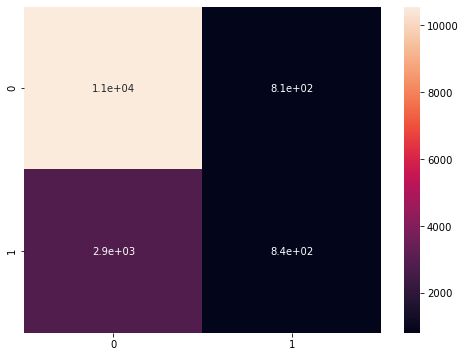

In [25]:
svc_classifier=SVC(kernel='sigmoid')
svc_classifier.fit(x,y)
y_pred_test=svc_classifier.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred_test),3))
print('precision is        : ',round(precision_score(y_test,y_pred_test),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred_test),3))
print('recall value is     : ',round(recall_score(y_test,y_pred_test),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True)

Inference

The kernal linear gives better result compared to all other kernal

### Treating imbalanced datase

In [9]:
!pip install imblearn

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)
x_sm.shape,y_sm.shape

((45306, 13), (45306,))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.2,stratify=y_sm)

accuracyscore is    :  0.626
precision is        :  0.879
AUc score is        :  0.626
recall value is     :  0.293
comfusion matrix:


<AxesSubplot:>

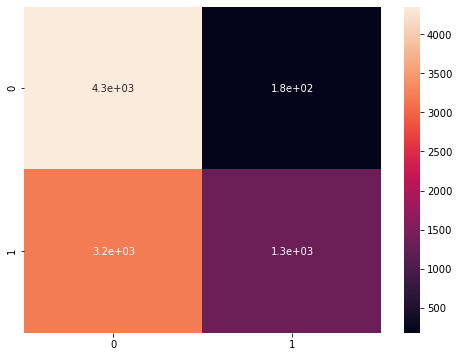

In [17]:
svc_classifier=SVC()
svc_classifier.fit(x_train_sm,y_train_sm)
y_pred_test=svc_classifier.predict(x_test_sm)

print('accuracyscore is    : ',round(accuracy_score(y_test_sm,y_pred_test),3))
print('precision is        : ',round(precision_score(y_test_sm,y_pred_test),3))
print('AUc score is        : ',round(roc_auc_score(y_test_sm,y_pred_test),3))
print('recall value is     : ',round(recall_score(y_test_sm,y_pred_test),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test_sm,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True)